# Supervised Learning Algorithms

### By **[NimbleBox](https://www.nimblebox.ai)**

<a href="https://www.nimblebox.ai"><img src="./assets/nbx.jpeg" alt="NimbleBox.ai logo" width="600"/></a>

This notebook contains parts from [Linear regression](https://github.com/chasinginfinity/ml-from-scratch) and CS229 lecture notes (Stanford).

## Things we are going  to learn

- Linear Regression
- Logistic Regression 

So you are probably thinking that these both algorithms have the word regression so they are probably used to solve the same type of problem that is regression or atleast used to do the same thing. But let me stop you right there despite them having the same word regression, Linear regression which you guessed right is used to solve problems that try to predict real values such as the example from the last notebook where we saw the prediction of house prices and Logistic Regression on the other hand is used to solve the problems in which you try to predict classes or categorical values which you also saw in the last notebook where we tried to classify cats🐈 and dogs🐕.

## Linear Regression

So for a moment let's just stop and think what we are trying to achieve here, Let's take the example from the previous notebook where you had some numbers giving you the area of the house formally called features in Machine Learning and you were trying to predict the price of the house which are called labels, So the problem at hand demands a solution which is essentially going to be function in which you can just put the features(area of the house) and it will give you the labels(house price), So as a human it's hard for you to come up with such a function by just looking at the data and we know machines are good with processing huge amounts of data. That's where Linear regression comes to help it give you a function in which you can just put features to get some labels.

Now let's take a glance at the formal definition of what Linear Regression actually is.

Linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$$ Y = mX + c $$

<img alt="mxplusc" src="./assets/slope_intercept.png" width=600 />

This is the equation for a line that you studied in high school. **m** is the slope of the line and **c** is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of **Y** for any given value of **X**.  
  
Our challenege today is to determine the value of **m** and **c**, such that the line corresponding to those values is the best fitting line or gives the minimum error.  
### Loss function  
The loss is the error in our predicted of **m** and **c**. Our goal is to minimize this error to obtain the most accurance value of **m** and **c**.  
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:
1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.  
2. Square this difference.
3. Find the mean of the squares for every value in X.  
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar y_i)^2\\]  

Here $y_i$ is the actual value and $\bar y_i$ is the predicted value. Lets substitue the value of $\bar y_i$
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i + c))^2\\]
So we square the error and find the mean. hence the name Mean Squared Error.  
Now that we have defined the loss function, lets get into the interesting part - minimizing it and finding **m** and **c**

### The Gradient Descent Algorithm  
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.  
**Understanding Gradient Descent**  
<img alt="valley" src="./assets/valley-illustration.jpg" width=600 />  

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.   
Let's try applying gradient descent to **m** and **c** and approach it step by step: 
1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of **m** changes with each step. L could be a small value like 0.0001 for good accuracy. 
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value **D**.  
\\[ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i + c))(-x_i) \\]
\\[ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar y_i) \\]  
$D_m$ is the value of the partial derivative with respect to **m**. Similarly lets find the partial derivative with respect to **c**, $D_c$ :  
\\[ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar y_i) \\]
3. Now we update the current value of **m** and **c** using the following equation: 
\\[ m = m - L \times D_m\\]  
\\[ c = c - L \times D_c\\]  
4. We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of **m** and **c** that we are left with now will be the optimum values.  
  
Now going back to our analogy, **m** can be considered the current position of the person. **D** is equivalent to the steepness of the slope and **L** can be the speed with which he moves. Now the new value of **m** that we calculate using the above equation will be his next positon, and $L \times D$ will be the size of the steps he will take. When the slope is more steep (**D** is more) he takes longer steps and when it is less steep (**D** is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.  
We repeat the same process above to find the value of **c** also. Now with the optimum value of **m** and **c** our model is ready to make predictions !  

### Implementing the Model  

Now let's convert everything above into code and see our model in action !

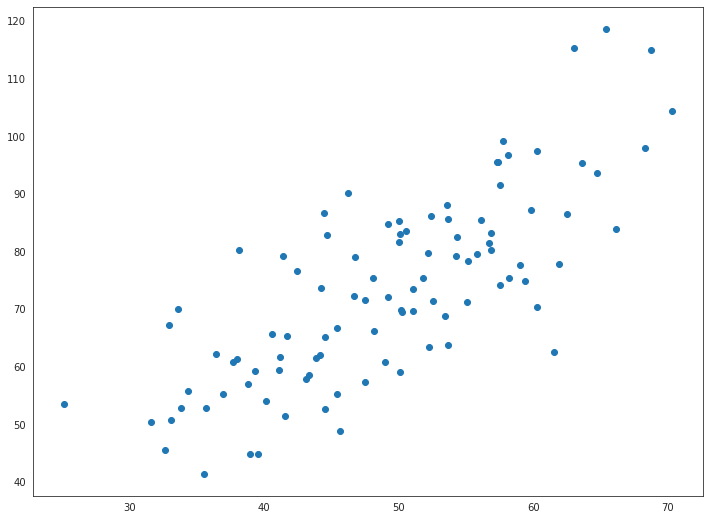

In [47]:
# Making the imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 

# Used to show the plots in the frontend of notebooks.
%matplotlib inline

# Modifying the plot size globally.
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data.
data = pd.read_csv('./assets/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [48]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print ("Value of m: ", m)
print ("Value of c: ", c)

Value of m:  1.4796491688889395
Value of c:  0.10148121494753726


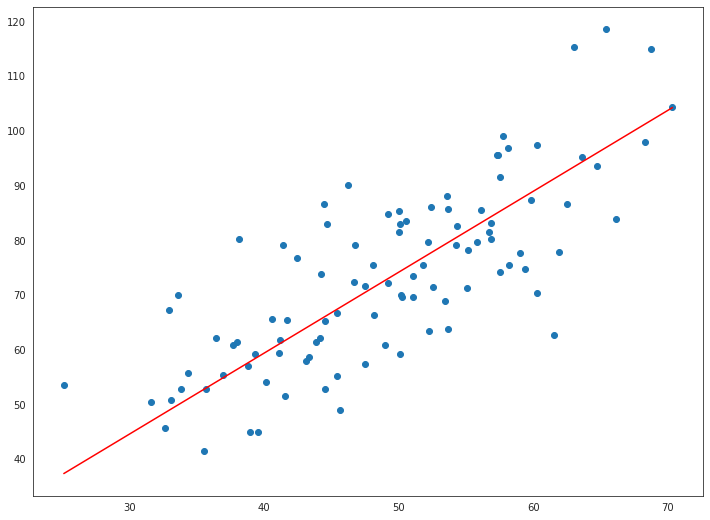

In [49]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

## Logistic Regression

We use Logistic Regression for the classification problems such as the one you saw in the last notebook where we classified dogs for cats.

    
This powerful machine learning model can be used to answer some questions such as:
* Whether an e-mail is spam or not
* If the customer will churn
* Whether a tumor is benign or malignant

All of the questions above are simply yes-no questions, therefore they can be used to classify input data into two classes. Hence, the term binary classification is used when the data can be categorized into two distinct classes. Obviously, multi-class classification deals with data that has more than two labels (classes). After grasping the ins and outs of logistic regression to make binary classification, transition to a multi-class classification is pretty straight-forward, as a consequence, here, we will deal with data that has two classes only.
    
Remember, that in linear regression we predict numerical values based on the input values and parameters of the model.Here, in logistic regression we can also approach the model as we are trying to predict numbers but this time these numbers correspond to the probability values of input data belonging to a particular class. 

The term logistic in logistic regression is used because this time we are applying another function to the weighted sum of input data and paratemeters of the model and this function is  called logit (sigmoid) function. 

Sigmoid function always outputs values between 0 and 1, and thus can be used to calculate probabilities of input data belonging to a certain class:

$$ sigmoid(x) =  1 / (1 + e^{-x})  $$

<img src="./assets/sigmoid.png" width="600"/>
    
Without further ado, let's start writing the code for this implementation. I will explain the code as I go, whenever deemed necessary. 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

We start off by importing necessary libraries. As always, NumPy is the only package that we will use in order to implement the logistic regression algorithm. All the others will only help us with minor issues such as visualizing the data at hand or creating a dataset. Hence, we won't be using already implemented package solutions for logistic regression.

In [51]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Here, we write the code for the aforementioned sigmoid (logit) function. It is important to note that this function can be applied to all of the elements of a numpy array individually, simply because we make use of the exponential function from the NumPy package.

In [52]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

Next, we write the cost function for logistic regression. Note that the cost function used in logistic regression is different than the one used in linear regression.

Remember, in linear regression we calculated the weighted sum of input data and parameters and fed that sum to the cost function to calculate the cost. When we plotted the cost function it was seen to be convex, hence a local minimum was also the global minimum.

However, in logistic regression, we apply sigmoid function to the weighted sum which makes the resulting outcome non-linear. If we feed that non-linear outcome to the cost function, what we get would be a non-convex function and we wouldn't be assured to find only one local minimum that is also the global minimum.

As a result, we use another cost function to calculate the cost which is guaranteed to give one local minimum during the optimization.

In [53]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

Gradient descent implementation here is not so different than the one we used in linear regression. Only difference to be noted is the sigmoid function that is applied to the weighted sum.

In [54]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

While writing out the prediction function, let's not forget that we are dealing with probabilities here. Hence, if the resulting value is above 0.50, we round it up to 1, meaning the data point belongs to the class 1. Consequently, if the probability of a data point belonging to the class 1 is below 0.50, it simply means that it is part of the other class (class 0). Remember that this is binary classification, so we have only two classes (class 1 and class 0).

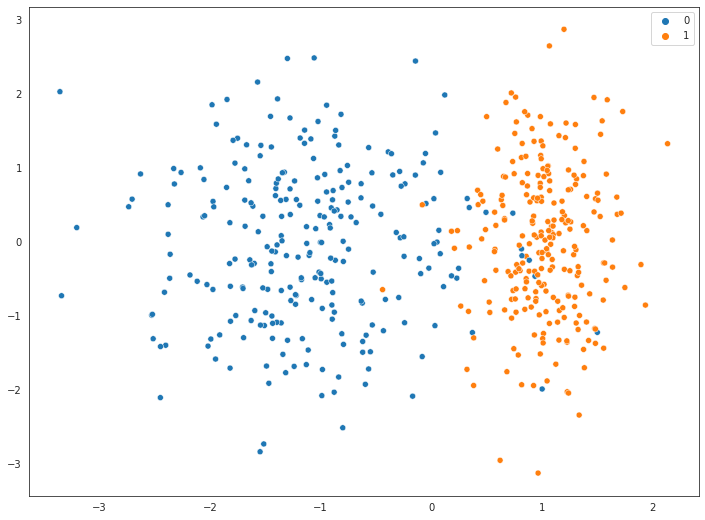

In [55]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y.reshape(-1));

After coding out the necessary functions, let's create our own dataset with make_classification function from sklearn.datasets. We create 500 sample points with two classes and plot the dataset with the help of seaborn library.

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



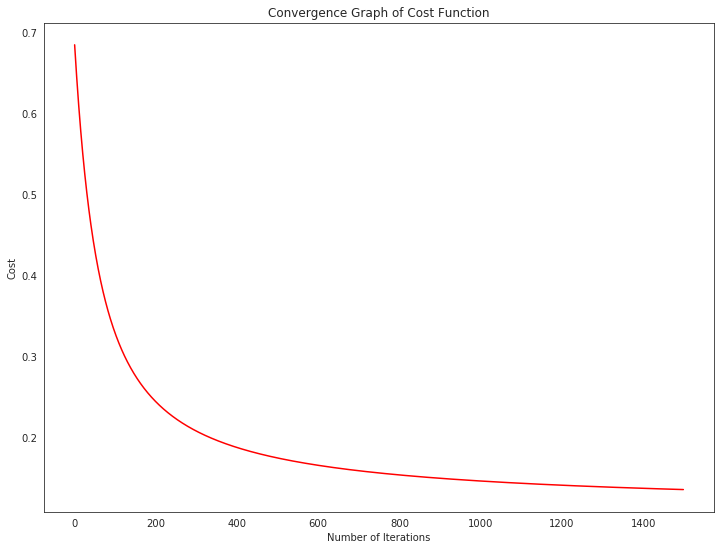

In [56]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Now, let's run our algorithm and calculate the parameters of our model. Seeing plot, we can now be sure that we have implemented the logistic regression algorithm without a fault, since it decreases with every iteration until the decrease is so minimal that the cost converges to a minimum which is what we want indeed.

In [57]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.966


After running the algorithm and getting the optimal parameters, we want to know how successful our model is at predicting the classes of our data. For this reason, we use accuracy_score function from sklearn.metrics to calculate the accuracy.

slope = - ( params_optimal [1] / params_optimal [2] )

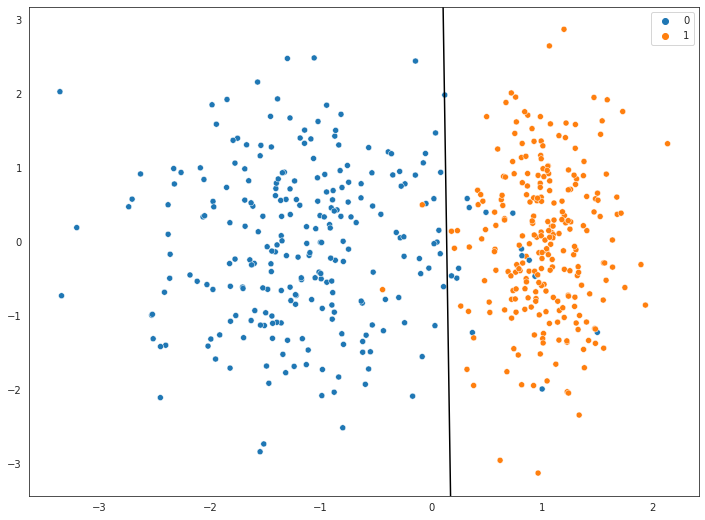

In [58]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(x=X[:,1],y=X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

Now, for the sake of visualization lets plot our dataset along with the decision boundary of our model. We simply calculate the intercept and slope values using the optimal parameters and plot the boundary that classifies the data into two classes. We can see from the plot that the classification is not 100% correct since the separation of classes is not linear naturally. Nevertheless, misclassified points (false positives and false negatives) are really few, so we have done a pretty good job with this implementation of logistic regression.

### End Note 

Now you are armed with two pretty versatile algorithms that can be applied to a great range of problems so go ahead and try them and give yourself a pat for completing the whole notebook 👏, Hope you learned a lot.